In [1]:
import functools
import logging
logging.basicConfig(level=logging.DEBUG)

import graphcat.notebook
import imagecat.color.basic
import imagecat.color.brewer
import imagecat.notebook

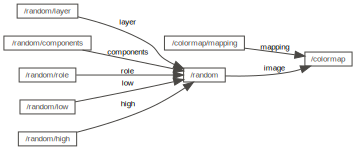

INFO:imagecat.operator:Task /random uniform:
INFO:imagecat.operator:  components: ['']
INFO:imagecat.operator:  high: 1.0
INFO:imagecat.operator:  layer: L
INFO:imagecat.operator:  low: 0.0
INFO:imagecat.operator:  res: [256 256]
INFO:imagecat.operator:  role: Role.NONE
INFO:imagecat.operator:  seed: 1234
INFO:imagecat.operator:  output: Image(L: Layer(256x256x1 float16 [''] Role.NONE))
INFO:imagecat.operator:Task /colormap colormap:
INFO:imagecat.operator:  layers: *
INFO:imagecat.operator:  mapping: functools.partial(<function linear_map at 0x7fd7682cf7a0>, palette=<imagecat.color.Palette object at 0x7fd76930a210>)
INFO:imagecat.operator:  output: Image(L: Layer(256x256x3 float64 ['r', 'g', 'b'] Role.RGB))



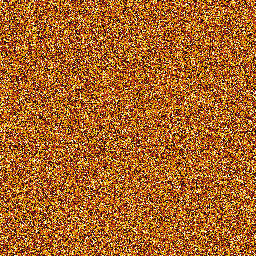

In [2]:
mapping = functools.partial(imagecat.color.linear_map, palette=imagecat.color.basic.palette("Blackbody"))

graph = graphcat.Graph()
imagecat.add_task(graph, "/random", imagecat.operator.uniform, layer="L", components=[""], role=imagecat.data.Role.NONE, low=0, high=1)
imagecat.add_task(graph, "/colormap", imagecat.operator.colormap, mapping=mapping)
imagecat.add_links(graph, "/random", ("/colormap", "image"))
graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/colormap"), height="512px")

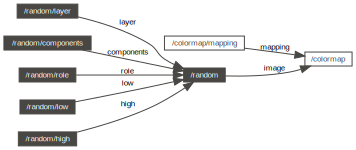

INFO:imagecat.operator:Task /colormap colormap:
INFO:imagecat.operator:  layers: *
INFO:imagecat.operator:  mapping: functools.partial(<function categorical_map at 0x7fd7682ca0e0>, palette=<imagecat.color.Palette object at 0x7fd769ac9b10>)
INFO:imagecat.operator:  output: Image(L: Layer(256x256x3 float64 ['r', 'g', 'b'] Role.RGB))



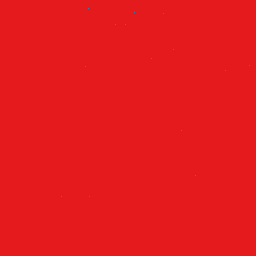

In [3]:
mapping = functools.partial(imagecat.color.categorical_map, palette=imagecat.color.brewer.palette("Set1"))
graph.set_task("/colormap/mapping", graphcat.constant(mapping))
graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/colormap"), height="512px")

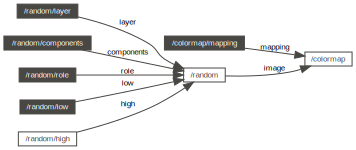

INFO:imagecat.operator:Task /random uniform:
INFO:imagecat.operator:  components: ['']
INFO:imagecat.operator:  high: 5.0
INFO:imagecat.operator:  layer: L
INFO:imagecat.operator:  low: 0.0
INFO:imagecat.operator:  res: [256 256]
INFO:imagecat.operator:  role: Role.NONE
INFO:imagecat.operator:  seed: 1234
INFO:imagecat.operator:  output: Image(L: Layer(256x256x1 float16 [''] Role.NONE))
INFO:imagecat.operator:Task /colormap colormap:
INFO:imagecat.operator:  layers: *
INFO:imagecat.operator:  mapping: functools.partial(<function categorical_map at 0x7fd7682ca0e0>, palette=<imagecat.color.Palette object at 0x7fd769ac9b10>)
INFO:imagecat.operator:  output: Image(L: Layer(256x256x3 float64 ['r', 'g', 'b'] Role.RGB))



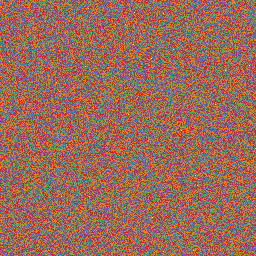

In [4]:
graph.set_task("/random/high", graphcat.constant(5))
graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/colormap"), height="512px")